# Pandas Test - Real life Exercise

In [1]:
import pandas as pd

For visualizations:

In [2]:
import cufflinks as cf; cf.go_offline()
import plotly_express as px

## About the data

The data you are about to load is coming from an Ad recommentation system of the company InBrain. InBrain is a adTech company and specalize in next-level ad recommendation.  
The company has two major products - one giving high quality recommendation while the other is giving an highly yielding recommendation. Inbrain customers are sending requests, asking for either of the products. 

Once a week, the company is doing an internal quality assements, and sends a sample of its traffic requests to external annotation process, in which the annotators are trained to manually decided whether the recommended Ad is a succes or not. The data contains information about the ad (**ad_id**), the sampled week (**week_id**), the requester company (**requester**), the region of operation (**region**), the recommendation type (Quality/Yield, **recommendation_type**) and the recommendation provider algorithm (**rec_provider**). The annotators are marking whether the recommendation is meeting the Quality/Yield standards (**is_success**) and whether or not the recommendation is severly defected (**is_sever**)

See a sample below:

In [9]:
import os
os.chdir('C:\\Users\\Liron\\ML\\Python-ML--Pandas/')  

In [10]:
ad_recs_annotated = pd.read_csv('data/ad_annotations.csv')
ad_recs_annotated.sample(5)

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider
312620,2022-week_03,AD008VND88,Extreme DA,US,yes,NaN,Yield,RNNY
85269,2021-week_38,AD000CQ6CU,Extreme DA,US,yes,NaN,Yield,DNNY
316139,2022-week_04,AD078SC8WL,RelayFoods,DE,no,True,Qality,UserPopQ
259510,2021-week_51,AD08888DPJ,RelayFoods,DE,no,True,Qality,DNNQ
221077,2021-week_48,AD088MCJX,MoJoe Brewing Company,GB,yes,NaN,Yield,RNNY


Your job, as the new and only data scientist of the company, is to get familiar with the the data, show week-over-week trends and produce insightfull graphs as a preparation to a full blown BI dashboard.

## Questions

### Data Modifications

1. Add a column with the sample year
1. Add a column with the sample quarter (google how to)
1. Add a new success column with values 1 and 0 for yes and no 
1. Are there any NaNs in the is_sever column? Count how many and create a new column with NaNs filled as False. Check that indeed the new column contaion no NaNs. 
1. Capitlize (first letter only) the is_success column (Inplace)

#### Q1

In [11]:
def_new = ad_recs_annotated

In [12]:
def_new = pd.concat([def_new, def_new.week_id.apply(lambda str: str[0:4])], axis=1)
def_new.columns = ['week_id', 'ad_id', 'requester', 'region', 'is_success', 'is_sever',
       'recommendation_type', 'rec_provider', 'Year']

In [13]:
def_new.sample(5)

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,Year
128875,2021-week_41,AD00CNTK8L,Tab Solutions,US,yes,NaN,Qality,DNNQ,2021
138317,2021-week_42,AD07GWJQ8J,RelayFoods,JP,yes,NaN,Qality,DNNQ,2021
87251,2021-week_39,AD08XK8S77,iDreamsky Technology,DE,no,False,Qality,UserPopQ,2021
262804,2021-week_51,AD07QTDC6W,Search Million Culture,GB,yes,NaN,Qality,DNNQ,2021
111904,2021-week_40,AD078FVQNW,Fancy,US,yes,NaN,Qality,ManualQ,2021


#### Q2

<AxesSubplot:>

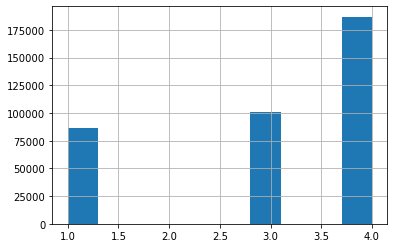

In [14]:
num = def_new.week_id.apply(lambda str: str[(len(str)-2):len(str)]).astype(int)
num = ((num - 1) // 13) + 1
num.hist()

In [15]:
quarter = num.apply(lambda q : f'Quarter {q}')
quarter

0         Quarter 3
1         Quarter 3
2         Quarter 3
3         Quarter 3
4         Quarter 3
            ...    
373783    Quarter 4
373784    Quarter 4
373785    Quarter 4
373786    Quarter 4
373787    Quarter 4
Name: week_id, Length: 373788, dtype: object

In [16]:
def_new['Quarter'] = quarter
def_new[def_new.Quarter == 'Quarter 1']

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,Year,Quarter
271615,2022-week_01,AD07PX8V89,MoJoe Brewing Company,DE,yes,NaN,Yield,DNNY,2022,Quarter 1
271616,2022-week_01,AD08XFPDPN,Search Million Culture,DE,yes,NaN,Qality,DNNQ,2022,Quarter 1
271617,2022-week_01,AD079G86YX,RelayFoods,DE,yes,NaN,Qality,DNNQ,2022,Quarter 1
271618,2022-week_01,AD087J9J8D,Fry Multimedia,DE,yes,NaN,Qality,DNNQ,2022,Quarter 1
271619,2022-week_01,AD08DKR8JP,Search Million Culture,DE,yes,NaN,Qality,DNNQ,2022,Quarter 1
...,...,...,...,...,...,...,...,...,...,...
357853,2022-week_06,AD00WLORXN,Extreme DA,US,no,True,Yield,DNNY,2022,Quarter 1
357854,2022-week_06,AD008FU68J,Fancy,US,yes,NaN,Qality,RNNQ,2022,Quarter 1
357855,2022-week_06,AD098DJ8DJ,Extreme DA,US,no,False,Yield,RuleBasedY,2022,Quarter 1
357856,2022-week_06,AD096VCKMJ,Extreme DA,US,yes,NaN,Yield,RNNY,2022,Quarter 1


#### Q3

In [17]:
dict = {'yes':1,'no':0}
def_new['binary_success'] = def_new.is_success.map(dict)

In [18]:
def_new.sample(10)

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,Year,Quarter,binary_success
270613,2021-week_51,AD079R787S,Extreme DA,US,yes,NaN,Yield,RNNY,2021,Quarter 4,1
197022,2021-week_46,AD0080TQGR,RelayFoods,JP,no,True,Qality,DNNQ,2021,Quarter 4,0
278406,2022-week_01,AD07T8NWDJ,MoJoe Brewing Company,IN,yes,NaN,Yield,UserPopY,2022,Quarter 1,1
330506,2022-week_05,AD0888CXDD,Search Million Culture,DE,yes,NaN,Qality,DNNQ,2022,Quarter 1,1
191165,2021-week_46,AD008MZV8O,Fancy,GB,yes,NaN,Qality,ManualQ,2021,Quarter 4,1
329239,2022-week_05,AD08PMJYPR,MoJoe Brewing Company,DE,no,True,Yield,UserPopY,2022,Quarter 1,0
36068,2021-week_35,AD08HGCLUH,Puentes Company,IN,yes,NaN,Yield,ManualQ,2021,Quarter 3,1
120708,2021-week_41,AD00PXJWJJ,Search Million Culture,IN,yes,NaN,Qality,ManualQ,2021,Quarter 4,1
153836,2021-week_43,AD089Y6W8K,RelayFoods,JP,yes,NaN,Qality,DNNQ,2021,Quarter 4,1
318914,2022-week_04,AD008TEZHW,Fancy,GB,yes,NaN,Qality,DNNQ,2022,Quarter 1,1


#### Q4

In [19]:
def_new[['is_sever','ad_id']].groupby('is_sever',dropna=False).count()

,ad_id
is_sever,
False,24904
True,44689
NaN,304195


In [20]:
def_new['is_sever_full'] = def_new['is_sever'].fillna('False')
def_new[['is_sever_full','ad_id']].groupby('is_sever_full',dropna=False).count()

,ad_id
is_sever_full,
False,24904
True,44689
False,304195


In [21]:
def_new[def_new.is_sever_full.isnull()].shape[0]

0

#### Q5

In [22]:
def_new.is_success = def_new.is_success.str.capitalize()
def_new.sample(10)

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,Year,Quarter,binary_success,is_sever_full
302211,2022-week_03,AD07HS7T8P,RelayFoods,DE,No,True,Qality,DNNQ,2022,Quarter 1,0,True
126295,2021-week_41,AD097T9JN8,Extreme DA,US,Yes,NaN,Yield,RNNY,2021,Quarter 4,1,False
131613,2021-week_42,AD088FY8NW,RelayFoods,DE,Yes,NaN,Qality,DNNQ,2021,Quarter 4,1,False
210958,2021-week_47,AD08JVQDTG,RelayFoods,JP,No,True,Qality,DNNQ,2021,Quarter 4,0,True
130949,2021-week_42,AD08C88N8F,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2021,Quarter 4,1,False
327835,2022-week_04,AD09KLSGJJ,Extreme DA,US,No,False,Yield,RuleBasedY,2022,Quarter 1,0,False
40843,2021-week_35,AD08IAIJTO,iDreamsky Technology,US,Yes,NaN,Qality,RNNQ,2021,Quarter 3,1,False
265122,2021-week_51,AD08HZSQOI,MoJoe Brewing Company,IN,No,True,Yield,RuleBasedY,2021,Quarter 4,0,True
101107,2021-week_40,AD0888S8T8,Search Million Culture,DE,No,False,Qality,UserPopQ,2021,Quarter 4,0,False
234393,2021-week_49,AD098RN7R8,RelayFoods,GB,Yes,NaN,Qality,DNNQ,2021,Quarter 4,1,False


### Subset selection

for each question, sub-select the data by using the conditional selection (`[]`) and the `.query` API. Use `.shape` on the subselection to obtain the result.  
For example:
`df.query('some_condition').shape`

1. How many requests are there in US region? 
1. How many **successful** requests are there in US region? 
1. How many **successful** requests are there in US region, on week 52?
1. How many requests where delivered by DNNQ, RNNY and UserPopQ together? 
1. How many requests where delivered by rule based providers? 
1. Select only the requests from 2021 - How many are there? 
1. Select the reqeusts from week 30 to week 40 - How many are there? 
1. Select all the data that comes from the most popular Ad
1. Select all the data that comes from the least popular provider
1. Select the data in which is_sever is None. How big is it? 
1. Select the data in which the requester is a 3 word company
1. Select the data in which the requester is a 3 word company, and the ad_id has the letter 6 in it
1. Select the data in which the requester is a 3 word company, and the multiplication of all the numbers in the ad_id is bigger than 30

#### Q1

In [23]:
def_new.query('region == "US"').shape[0]

103846

#### Q2

In [24]:
def_new.query('region == "US" and is_success == "Yes"').shape[0]

88918

#### Q3

In [25]:
def_new[def_new.week_id.str.endswith('52', na=False)].query('region == "US" and is_success == "Yes"').shape[0]


3342

#### Q4

In [26]:
def_new.query('rec_provider == "DNNQ" or rec_provider == "RNNY" or rec_provider == "UserPopQ"').shape[0]

200093

#### Q5

In [27]:
def_new.groupby('rec_provider',dropna=False).count()

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,Year,Quarter,binary_success,is_sever_full
rec_provider,,,,,,,,,,,
BooksQ,1720,1720,1720,1720,1720,281,1720,1720,1720,1720,1720
BooksY,4150,4150,4150,4150,4150,84,4150,4150,4150,4150,4150
DNNQ,117424,117424,117424,117424,117424,16632,117424,117424,117424,117424,117424
DNNY,45116,45116,45116,45116,45116,5110,45116,45116,45116,45116,45116
ManualQ,13844,13844,13844,13844,13844,650,13844,13844,13844,13844,13844
ManualY,1982,1982,1982,1982,1982,187,1982,1982,1982,1982,1982
RNNQ,20983,20983,20983,20983,20983,2045,20983,20983,20983,20983,20983
RNNY,12732,12732,12732,12732,12732,1024,12732,12732,12732,12732,12732
RuleBased,182,182,182,182,182,6,182,182,182,182,182


In [28]:
def_new.query('rec_provider == "RuleBased" or rec_provider == "RuleBasedY"').shape[0]

28336

#### Q6

In [29]:
def_new.query('Year == "2021"').shape[0]

271615

#### Q7

In [30]:
week_numbers = def_new.week_id.apply(lambda str: str[-2:])
week_numbers.astype(int)
def_new = pd.concat([def_new, week_numbers], axis=1)
def_new.columns = ['week_id', 'ad_id', 'requester', 'region', 'is_success', 'is_sever',
       'recommendation_type', 'rec_provider', 'Year','Quarter','binary_success','is_sever_full','week_number']

In [31]:
def_new.query('week_number >= "30" and week_number <= "40"').shape[0]

115051

#### Q8

In [32]:
ad_success = def_new[def_new.is_success == "Yes"]
ad_success['ad_id'].value_counts()
ad_x = ad_success['ad_id'].mode()
def_new[def_new.ad_id == ad_x[0]].shape[0]

247

#### Q9

In [33]:
provider_failure = def_new[def_new.is_success == "No"]
provider_failure['rec_provider'].value_counts()

UserPopQ             17654
DNNQ                 16630
RuleBasedY           11978
UserPopY             10544
DNNY                  5111
XGBQ                  2387
RNNQ                  2045
RNNY                  1023
ManualQ                648
XGBY                   554
UserPopSelectionQ      447
BooksQ                 281
ManualY                187
BooksY                  84
RuleBased                6
UserPopSelectionY        3
Name: rec_provider, dtype: int64

In [34]:
provider_x = provider_failure['rec_provider'].mode()
def_new[def_new.rec_provider == provider_x[0]].groupby('is_success').count()['rec_provider']

is_success
No     17654
Yes    52283
Name: rec_provider, dtype: int64

In [35]:
def_new[def_new.rec_provider == provider_x[0]].shape[0]

69937

#### Q10

In [36]:
def_new.is_sever.isna().sum()

304195

#### Q11

In [37]:
requester_word_count = def_new.requester.apply(lambda str: len(str.split()))
def_new[requester_word_count == 3].shape[0]

118141

#### Q12

In [38]:
requester_find_6 = def_new.requester.apply(lambda str: str.find('6')>0)
def_new[requester_find_6].shape[0]

5895

#### Q13

In [39]:
def digit_mult(str):
    mult = 1
    at_least_one_digit = 0
    for m in str:
        if m.isdigit():
            mult = mult* int(m)
            at_least_one_digit = 1
    return mult * at_least_one_digit
        
requester_find_digits_multiplier = def_new.requester.apply(lambda str: digit_mult(str))
def_new[requester_find_digits_multiplier > 30].shape[0]

5895

### Analysis

1. How many weeks available in the data? Are there any missing weeks? 
1. How many regions available in the data? Are there any missing weeks per region? 
1. How many ads are being sent to annotation in each region per week?
1. How many None values are there in is_sever column? 
1. Are ads being sent more than one time in a given week? what is the ad_id that was sent the most in a given week? (e.g. ad X was sent 50 times in week Y)
1. Are there ads that are being sent in more than one week?
   1. Which is the ad that was sent in most amount of weeks (e.g. ad X where sent in Y different weeks)
   2. What are the weeks that the ad from above was sent in? 
   3. Is there an Ad that was succsefull in one week, but not succesfful in a different week? Show one.
1. When is_sever is None, what is the number of successful requests? What is the number of non-successful requests? What do you learn from it about the reason for Nones in the first place? 
1. Per each region, What is the Quality/Yield traffic proportion WoW? 
1. How many different reqeusters are there? 
1. Which are the top 5 requesters per region? 
1. Which are the different rec_proivders?
1. Are there different rec providers per region? 
1. Are there different rec providers per rec type?
1. What are the notation rules distinguishing between quality vs yielding providers?
1. Which is the most successful region of operation? 
1. Which is the most successful rec provider per each region? 
1. Present a table with a success rate, sever defects rate and CI (for each metric) per region
1. Present a table with a success rate, sever defects rate and CI (for each metric) per rec provider
1. Present a table with a success rate, sever defects rate and CI (for each metric) per region and rec provider combinations
1. Present a table with a success rate, sever defects rate and CI (for each metric) per rec type (Q/Y)
1. Present a table with a success rate, sever defects rate and CI (for each metric) per rec type and region
1. Present WoW table/graph with success rate and CI (see image below) per region
1. Present WoW table/graph with success rate and CI (see image below) per region and rec type
1. Present WoW table/graph with success rate and CI (see image below) per region and rec provider
1. Which are the requester to which we succeed the most?
1. Which are the requester to which we produce the most critical defects?
1. What is the overall success rate trend over time? 
1. What is the overall sever defect rate trend over time? 
1. Preset a WoW graph showing the number of requests per customer in each region (hint: [use stacked bars](https://plotly.com/python/bar-charts/)), from it:
  1. Identify major traffic shape changes (addition/removal) of major clients
1. Preset a WoW graph showing the **requests proportion** per customer in each region (hint: [use stacked bars](https://plotly.com/python/bar-charts/)), from it:
  1. Identify major traffic shape changes (addition/removal) of major clients


Analysis Bonus questions:
1. Compute the per region success rate and CI in trailing weeks, Say, 4 weeks instead of 1 week - to allow for smoother estimations and smaller CIs

#### Q1

In [40]:
def_new[['ad_id','week_id']].groupby('week_id').count()
#There are 5 regions, for each of them weeks 7 till 51 of year 2022 are not in the database also week 52 of year 2021 is missing

,ad_id
week_id,
2021-week_33,14356
2021-week_34,14371
2021-week_35,14373
2021-week_36,14390
2021-week_37,14392
2021-week_38,14347
2021-week_39,14416
2021-week_40,14406
2021-week_41,14380


#### Q2

In [41]:
# How many regions available in the data? Are there any missing weeks per region? 
pd. set_option('display.max_rows', None) # or 1000.
def_new[['week_id','region']].groupby(['region','week_id']).count()
#for all regions - weeks 7 till 51 of year 2022 are not in the database also week 52 of year 2021 is missing

Empty DataFrame
Columns: []
Index: [(DE, 2021-week_33), (DE, 2021-week_34), (DE, 2021-week_35), (DE, 2021-week_36), (DE, 2021-week_37), (DE, 2021-week_38), (DE, 2021-week_39), (DE, 2021-week_40), (DE, 2021-week_41), (DE, 2021-week_42), (DE, 2021-week_43), (DE, 2021-week_44), (DE, 2021-week_45), (DE, 2021-week_46), (DE, 2021-week_47), (DE, 2021-week_48), (DE, 2021-week_49), (DE, 2021-week_50), (DE, 2021-week_51), (DE, 2022-week_01), (DE, 2022-week_02), (DE, 2022-week_03), (DE, 2022-week_04), (DE, 2022-week_05), (DE, 2022-week_06), (DE, 2022-week_52), (GB, 2021-week_33), (GB, 2021-week_34), (GB, 2021-week_35), (GB, 2021-week_36), (GB, 2021-week_37), (GB, 2021-week_38), (GB, 2021-week_39), (GB, 2021-week_40), (GB, 2021-week_41), (GB, 2021-week_42), (GB, 2021-week_43), (GB, 2021-week_44), (GB, 2021-week_45), (GB, 2021-week_46), (GB, 2021-week_47), (GB, 2021-week_48), (GB, 2021-week_49), (GB, 2021-week_50), (GB, 2021-week_51), (GB, 2022-week_01), (GB, 2022-week_02), (GB, 2022-week_03), (GB, 2022-week_04), (GB, 2022-week_05), (GB, 2022-week_06), (GB, 2022-week_52), (IN, 2021-week_33), (IN, 2021-week_34), (IN, 2021-week_35), (IN, 2021-week_36), (IN, 2021-week_37), (IN, 2021-week_38), (IN, 2021-week_39), (IN, 2021-week_40), (IN, 2021-week_41), (IN, 2021-week_42), (IN, 2021-week_43), (IN, 2021-week_44), (IN, 2021-week_45), (IN, 2021-week_46), (IN, 2021-week_47), (IN, 2021-week_48), (IN, 2021-week_49), (IN, 2021-week_50), (IN, 2021-week_51), (IN, 2022-week_01), (IN, 2022-week_02), (IN, 2022-week_03), (IN, 2022-week_04), (IN, 2022-week_05), (IN, 2022-week_06), (IN, 2022-week_52), (JP, 2021-week_33), (JP, 2021-week_34), (JP, 2021-week_35), (JP, 2021-week_36), (JP, 2021-week_37), (JP, 2021-week_38), (JP, 2021-week_39), (JP, 2021-week_40), (JP, 2021-week_41), (JP, 2021-week_42), (JP, 2021-week_43), (JP, 2021-week_44), (JP, 2021-week_45), (JP, 2021-week_46), (JP, 2021-week_47), (JP, 2021-week_48), (JP, 2021-week_49), (JP, 2021-week_50), (JP, 2022-week_01), (JP, 2022-week_02), (JP, 2022-week_03), (JP, 2022-week_04), ...]

#### Q3

In [42]:
# How many ads are being sent to annotation in each region per week?
pd. set_option('display.max_rows', 30)
def_new[['week_id','region','is_success']].groupby(['region','week_id'], dropna = False).count()

is_success
region week_id                 
DE     2021-week_33        2395
       2021-week_34        2360
       2021-week_35        2393
       2021-week_36        2401
       2021-week_37        2404
...                         ...
US     2022-week_03        3979
       2022-week_04        3999
       2022-week_05        3998
       2022-week_06        3992
       2022-week_52        3998

[129 rows x 1 columns]

#### Q4

How many None values are there in is_sever column?

In [43]:
def_new.is_sever.isna().sum()

304195

#### Q5

Are ads being sent more than one time in a given week? what is the ad_id that was sent the most in a given week? (e.g. ad X was sent 50 times in week Y)

In [44]:
# https://stackoverflow.com/questions/38933071/group-by-two-columns-and-count-the-occurrences-of-each-combination-in-pandas
count_ad_per_week = def_new[['week_id','ad_id']].groupby(['week_id','ad_id'], dropna = False).size()
ad_counted_per_week_df = count_ad_per_week.to_frame(name = 'size').reset_index()

In [45]:
print(f' maximum times an ad was being sent in one week is {ad_counted_per_week_df["size"].max()}')

 maximum times an ad was being sent in one week is 81


In [46]:
ad_counted_per_week_df[ad_counted_per_week_df['size'] == ad_counted_per_week_df['size'].max()].head(20)

,week_id,ad_id,size
109078,2021-week_40,AD098SWYF6,81


#### Q6

Are there ads that are being sent in more than one week?
   1. Which is the ad that was sent in most amount of weeks (e.g. ad X where sent in Y different weeks)
   2. What are the weeks that the ad from above was sent in? 
   3. Is there an Ad that was succsefull in one week, but not succesfful in a different week? Show one.

In [47]:
count_ad_over_weeks = def_new[['ad_id','week_id']].groupby(['ad_id','week_id'], dropna = False)
count_ad_over_weeks = count_ad_over_weeks.size().to_frame(name = 'size').reset_index()
count_ad_over_weeks['count_week'] = 1
count_ad_over_weeks.head()
#over_weeks_ad_count_df = count_ad_over_weeks.reset_index()

,ad_id,week_id,size,count_week
0,AD00000088,2021-week_37,1,1
1,AD000000WF,2022-week_03,1,1
2,AD00000876,2021-week_34,1,1
3,AD00000888,2021-week_43,1,1
4,AD00000888,2022-week_02,1,1


In [48]:
ca = count_ad_over_weeks#.query('ad_id == "AD07PFFMP9"')
ca

,ad_id,week_id,size,count_week
0,AD00000088,2021-week_37,1,1
1,AD000000WF,2022-week_03,1,1
2,AD00000876,2021-week_34,1,1
3,AD00000888,2021-week_43,1,1
4,AD00000888,2022-week_02,1,1
...,...,...,...,...
358758,AD98988898,2021-week_43,1,1
358759,AD98988898,2022-week_05,1,1
358760,AD99798888,2021-week_42,1,1
358761,ADOO8X898E,2021-week_41,1,1


In [49]:
ba = ca.groupby('ad_id', as_index=False).count()
ba


,ad_id,week_id,size,count_week
0,AD00000088,1,1,1
1,AD000000WF,1,1,1
2,AD00000876,1,1,1
3,AD00000888,2,2,2
4,AD0000088C,1,1,1
...,...,...,...,...
300722,AD98980890,1,1,1
300723,AD98988688,1,1,1
300724,AD98988898,2,2,2
300725,AD99798888,1,1,1


In [50]:
ba[ba['week_id'] == ba['week_id'].max()].head(10)

,ad_id,week_id,size,count_week
84779,AD079VP6DH,26,26,26
118808,AD07PFFMP9,26,26,26
282865,AD098ZJV6Z,26,26,26


#### Q7

When is_sever is None, what is the number of successful requests? What is the number of non-successful requests? What do you learn from it about the reason for Nones in the first place? 

In [51]:
len(def_new[~def_new.is_sever.isnull()])

69593

In [52]:
len(def_new[~def_new.is_sever.isnull()].query('is_success == "No"'))

69576

In [53]:
len(def_new[def_new.is_sever.isnull()])

304195

In [54]:
len(def_new[def_new.is_sever.isnull()].query('is_success == "Yes"'))

304189

In [55]:
len(def_new[def_new.is_sever.isnull()].query('is_success == "No"'))

6

In [56]:
def_new[def_new.is_sever.isnull()].query('is_success == "No"')

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,Year,Quarter,binary_success,is_sever_full,week_number
21850,2021-week_34,AD07PC78Q8,Search Million Culture,IN,No,NaN,Qality,UserPopQ,2021,Quarter 3,0,False,34
38128,2021-week_35,AD098877VQ,Crescendo Networks,JP,No,NaN,Yield,RuleBasedY,2021,Quarter 3,0,False,35
176209,2021-week_45,AD08GKSWQ8,Search Million Culture,GB,No,NaN,Qality,DNNQ,2021,Quarter 4,0,False,45
202294,2021-week_47,AD00KYSI8,Search Million Culture,DE,No,NaN,Qality,UserPopQ,2021,Quarter 4,0,False,47
230420,2021-week_49,AD08VPSSS,LocalVox Media,DE,No,NaN,Yield,DNNY,2021,Quarter 4,0,False,49
231917,2021-week_49,AD07GZP8HJ,MoJoe Brewing Company,DE,No,NaN,Yield,RuleBasedY,2021,Quarter 4,0,False,49


is_sever is used when is_success == No, to gauge if the lack of success is severe or not. there are only 17 rows where success == Yes and there is a is_sever information

In [57]:
def_new[~def_new.is_sever.isnull()].query('is_success == "Yes"')

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,Year,Quarter,binary_success,is_sever_full,week_number
1455,2021-week_33,AD07CZZ7HN,Search Million Culture,DE,Yes,False,Qality,DNNQ,2021,Quarter 3,1,False,33
29302,2021-week_35,AD078WR7CG,Search Million Culture,DE,Yes,False,Qality,ManualQ,2021,Quarter 3,1,False,35
43268,2021-week_36,AD000NE8O8,Search Million Culture,DE,Yes,False,Qality,DNNQ,2021,Quarter 3,1,False,36
49148,2021-week_36,AD098ZJV6Z,Puentes Company,IN,Yes,True,Yield,UserPopY,2021,Quarter 3,1,True,36
49151,2021-week_36,AD098ZJV6Z,Puentes Company,IN,Yes,True,Yield,UserPopY,2021,Quarter 3,1,True,36
49153,2021-week_36,AD098ZJV6Z,Puentes Company,IN,Yes,True,Yield,UserPopY,2021,Quarter 3,1,True,36
61667,2021-week_37,AD07ZL888H,Search Million Culture,GB,Yes,True,Qality,UserPopQ,2021,Quarter 3,1,True,37
71687,2021-week_37,AD08898J9H,Extreme DA,US,Yes,True,Yield,RNNY,2021,Quarter 3,1,True,37
78517,2021-week_38,AD098ZJV6Z,Puentes Company,IN,Yes,True,Yield,UserPopY,2021,Quarter 3,1,True,38
89331,2021-week_39,AD07MJLL68,Tab Solutions,GB,Yes,True,Qality,XGBQ,2021,Quarter 3,1,True,39


#### Q8

Per each region, What is the Quality/Yield traffic proportion WoW? 

In [58]:
def_new[['week_id','recommendation_type','ad_id']].groupby(['week_id','recommendation_type']).count()

ad_id
week_id      recommendation_type       
2021-week_33 Qality               10002
             Yield                 4354
2021-week_34 Qality                9609
             Yield                 4762
2021-week_35 Qality                9365
...                                 ...
2022-week_05 Yield                 4998
2022-week_06 Qality                9715
             Yield                 4674
2022-week_52 Qality                9490
             Yield                 6440

[52 rows x 1 columns]

In [59]:
bn = def_new[['week_id','recommendation_type','ad_id']].groupby(['week_id','recommendation_type']).count()
bn = bn.unstack()
bn.index

Index(['2021-week_33', '2021-week_34', '2021-week_35', '2021-week_36',
       '2021-week_37', '2021-week_38', '2021-week_39', '2021-week_40',
       '2021-week_41', '2021-week_42', '2021-week_43', '2021-week_44',
       '2021-week_45', '2021-week_46', '2021-week_47', '2021-week_48',
       '2021-week_49', '2021-week_50', '2021-week_51', '2022-week_01',
       '2022-week_02', '2022-week_03', '2022-week_04', '2022-week_05',
       '2022-week_06', '2022-week_52'],
      dtype='object', name='week_id')

In [60]:
bn.columns

MultiIndex([('ad_id', 'Qality'),
            ('ad_id',  'Yield')],
           names=[None, 'recommendation_type'])

In [61]:
bn.head(5)

ad_id      
recommendation_type Qality Yield
week_id                         
2021-week_33         10002  4354
2021-week_34          9609  4762
2021-week_35          9365  5008
2021-week_36          9715  4675
2021-week_37          9701  4691

In [62]:
bn['proportion_Qal_to_Yei'] = bn[('ad_id', 'Qality')] / bn[('ad_id', 'Yield')]

In [63]:
bn.head()

ad_id       proportion_Qal_to_Yei
recommendation_type Qality Yield                      
week_id                                               
2021-week_33         10002  4354              2.297198
2021-week_34          9609  4762              2.017850
2021-week_35          9365  5008              1.870008
2021-week_36          9715  4675              2.078075
2021-week_37          9701  4691              2.068003

In [64]:
bn = bn.reset_index()

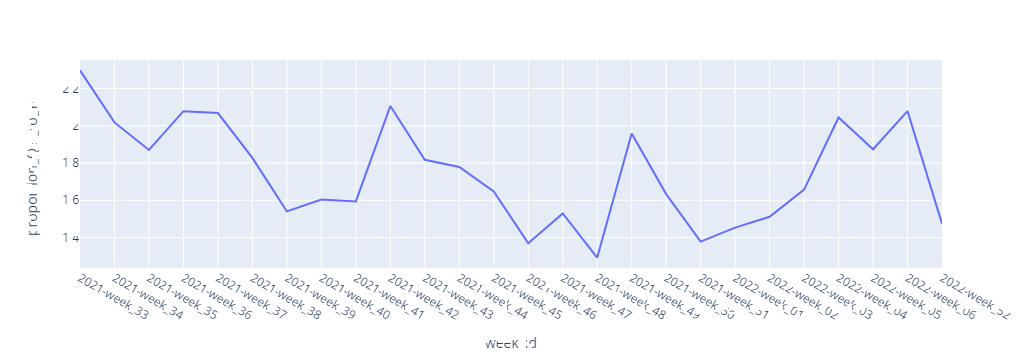

In [65]:
import plotly_express as px
px.line(bn, x='week_id',y='proportion_Qal_to_Yei')

#### Q9

How many different reqeusters are there? 

In [66]:
len(def_new['requester'].drop_duplicates())

36

In [67]:
len(def_new.groupby(['requester']).count())

36

#### Q10

Which are the top 5 requesters per region? 

https://cmdlinetips.com/2019/03/how-to-get-top-n-rows-with-in-each-group-in-pandas/

In [68]:
cf = def_new[['region','requester','week_id']].groupby(['region','requester']).count()
cf

week_id
region requester                    
DE     Allthetopbananas.com       51
       Bizanga                   107
       Crescendo Networks        573
       Cuiker                      6
       Extreme DA                115
...                              ...
US     Sensor Tower             3503
       Tab Solutions            9790
       VarVee                    119
       aPriori Technologies       57
       iDreamsky Technology     1137

[110 rows x 1 columns]

In [69]:
cf = cf.apply(lambda x : x.sort_values(ascending = False))
cf

week_id
region requester                      
US     Extreme DA                57215
IN     Puentes Company           29427
GB     Search Million Culture    28002
JP     RelayFoods                24574
DE     Search Million Culture    23657
...                                ...
US     PureSafe water systems        1
       Derceto                       1
       Cuiker                        1
       Marketo Japan                 1
JP     Cuiker                        1

[110 rows x 1 columns]

In [70]:
cf2 = cf.groupby(['region']).head(5)
cf2.sort_values(['region','requester','week_id'],ascending=[True,True,False])

week_id
region requester                      
DE     MoJoe Brewing Company      8616
       RelayFoods                17313
       SOLOMO365                  2435
       Search Million Culture    23657
       iDreamsky Technology       3542
GB     Fancy                     13678
       MoJoe Brewing Company      9530
       RelayFoods                15920
       Search Million Culture    28002
       iDreamsky Technology       3919
IN     MoJoe Brewing Company      7191
       Puentes Company           29427
       RelayFoods                17352
       Search Million Culture    21365
       iDreamsky Technology       1995
JP     LocalVox Media             1724
       MoJoe Brewing Company      3549
       RelayFoods                24574
       Search Million Culture     7906
       Tab Solutions              1366
US     Extreme DA                57215
       Fancy                     18668
       Search Million Culture     5610
       Sensor Tower               3503
       Tab Solutions              9790

#### Q11

Which are the different rec_proivders?

In [71]:
def_new['rec_provider'].drop_duplicates().reset_index()

,index,rec_provider
0,0,DNNQ
1,1,DNNY
2,3,BooksQ
3,6,UserPopQ
4,17,UserPopY
5,22,RuleBasedY
6,24,ManualY
7,27,ManualQ
8,76,BooksY
9,2396,XGBQ


#### Q12

Are there different rec providers per region? 

In [85]:
r_pro = def_new[['region','rec_provider']].drop_duplicates().reset_index()
r_pro.groupby('region').count()

,index,rec_provider
region,,
DE,9,9
GB,12,12
IN,6,6
JP,9,9
US,14,14


As seen by the count of providers, there is a difference, for example below, we can find the providers for JP and IN

In [88]:
r_df = r_pro.groupby('region').head(15)
#r_df.query('region == "JP" or region == "IN"')
display(r_df.query('region == "JP"')), display(r_df.query('region == "IN"'))

,index,region,rec_provider
27,8771,JP,ManualQ
28,8772,JP,UserPopQ
29,8774,JP,RuleBasedY
30,8781,JP,DNNQ
31,8786,JP,ManualY
32,8793,JP,DNNY
33,8797,JP,UserPopY
48,309185,JP,UserPopSelectionQ
49,352263,JP,UserPopSelectionY


,index,region,rec_provider
21,5575,IN,UserPopY
22,5576,IN,RuleBasedY
23,5577,IN,UserPopQ
24,5582,IN,ManualY
25,5585,IN,ManualQ
26,7773,IN,RuleBased


(None, None)

#### Q13

Are there different rec providers per rec type?

In [89]:
def_new.head()

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,Year,Quarter,binary_success,is_sever_full,week_number
0,2021-week_33,AD0088VOS,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2021,Quarter 3,1,False,33
1,2021-week_33,AD07KYS8JM,MoJoe Brewing Company,DE,Yes,NaN,Yield,DNNY,2021,Quarter 3,1,False,33
2,2021-week_33,AD08PDP6Y9,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2021,Quarter 3,1,False,33
3,2021-week_33,AD89608808,Search Million Culture,DE,Yes,NaN,Qality,BooksQ,2021,Quarter 3,1,False,33
4,2021-week_33,AD07CMVHP6,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2021,Quarter 3,1,False,33


In [90]:
def_new[['recommendation_type','rec_provider','ad_id']].groupby(['recommendation_type','rec_provider']).count()

ad_id
recommendation_type rec_provider             
Qality              BooksQ               1720
                    DNNQ               117424
                    ManualQ             10220
                    ManualY              1439
                    RNNQ                20983
                    RuleBased             182
                    UserPopQ            69937
                    UserPopSelectionQ    2417
                    XGBQ                12250
Yield               BooksY               4150
                    DNNY                45116
                    ManualQ              3624
                    ManualY               543
                    RNNY                12732
                    RuleBasedY          28154
                    UserPopSelectionY      21
                    UserPopY            38600
                    XGBY                 4276

Yes there are different rec_providers for example for Qality we have XGBQ and for Yield we have XGBY

Basically we have the same rec_provider just with an ending of Q for Qality and ending of Y for Yield (some exceptions: RulebasedY for Yield and Rulebased for Qality

#### Q14

What are the notation rules distinguishing between quality vs yielding providers?

**answered above in Q13**

#### Q15

Which is the most successful region of operation? 

In [97]:
su_reg = def_new[['region','binary_success']].groupby(['region']).sum()
su_reg = su_reg.reset_index()
su_reg

,region,binary_success
0,DE,50624
1,GB,69509
2,IN,63355
3,JP,31800
4,US,88918


In absolute numbers - the US region is the most successful

In [96]:
count_reg = def_new[['region','binary_success']].groupby(['region']).count()
count_reg = count_reg.reset_index()
count_reg

,region,binary_success
0,DE,62177
1,GB,82984
2,IN,83154
3,JP,41627
4,US,103846


In [98]:
su_reg['total_count'] = count_reg['binary_success']

In [101]:
su_reg['proportion_success'] = su_reg['binary_success'] / su_reg['total_count']

In [104]:
su_reg.sort_values('proportion_success',ascending=False)

,region,binary_success,total_count,proportion_success
4,US,88918,103846,0.856249
1,GB,69509,82984,0.837619
0,DE,50624,62177,0.814192
3,JP,31800,41627,0.763927
2,IN,63355,83154,0.761900


Proportion wise the US region is still the most successful

#### Q16

Which is the most successful rec provider per each region? 

#### Q17

Present a table with a success rate, sever defects rate and CI (for each metric) per region

#### Q18

Present a table with a success rate, sever defects rate and CI (for each metric) per rec provider

#### Q19

Present a table with a success rate, sever defects rate and CI (for each metric) per region and rec provider combinations

#### Q20

Present a table with a success rate, sever defects rate and CI (for each metric) per rec type (Q/Y)

#### Q21

Present a table with a success rate, sever defects rate and CI (for each metric) per rec type and region

#### Q22

Present WoW table/graph with success rate and CI (see image below) per region

#### Q23

Present WoW table/graph with success rate and CI (see image below) per region and rec type

#### Q24

Present WoW table/graph with success rate and CI (see image below) per region and rec provider

#### Q25

Which are the requester to which we succeed the most?

#### Q26

Which are the requester to which we produce the most critical defects?

#### Q27

What is the overall success rate trend over time? 

#### Q28

What is the overall sever defect rate trend over time? 

#### Q29

Preset a WoW graph showing the number of requests per customer in each region (hint: [use stacked bars](https://plotly.com/python/bar-charts/)), from it:
  1. Identify major traffic shape changes (addition/removal) of major clients  

#### Q30

Preset a WoW graph showing the **requests proportion** per customer in each region (hint: [use stacked bars](https://plotly.com/python/bar-charts/)), from it:
  1. Identify major traffic shape changes (addition/removal) of major clients



#### Q31

* Are there duplicated ads? To compact the data, remove duplicated ads and instead add an ad_count column **(pay attention, this is not trivial at all)**

at_least_one_digit### Compactization

### Merges and joins

The Wow samples and annotations task were sent and recieve seperatly, per each week. The dataset you were working on was constructed from those files. You can see the files under the `data/weekly` folder, here are the first 10 files:

In [8]:
import pandas as pd
import os
os.chdir('/Users/lironavineri/ML/Python-ML--Pandas/data/weekly')  
weekly_files = os.listdir('/Users/lironavineri/ML/Python-ML--Pandas/data/weekly')
sorted(weekly_files)[:10]

['.ipynb_checkpoints',
 '2021_33_DE_Qality_annotation_result.csv',
 '2021_33_DE_Yield_annotation_result.csv',
 '2021_33_DE__Sample.csv',
 '2021_33_GB_Qality_annotation_result.csv',
 '2021_33_GB_Yield_annotation_result.csv',
 '2021_33_GB__Sample.csv',
 '2021_33_IN_Qality_annotation_result.csv',
 '2021_33_IN_Yield_annotation_result.csv',
 '2021_33_IN__Sample.csv']

Your task is to reconstruct the dataset above. 

### Solution

Pseodu-code: 
1. for every week between 33 and 51 for year 2021 and for every week between 1 and 6 + week 52 of year 2022
1. for every region of the list: ['DE','GB','IN','JP','US']
1. merge quality annotations with quality samples
1. merge yield annotations with yield samples
1. Concatenate final Qality and Yield anotation results

In [9]:
region_list = ['DE','GB','IN','JP','US']
weeks_2021 = [*range(33,52)]
y_2021 = ['2021'] * len(weeks_2021)
weeks_2022 = [*range(1,7), 52]
#w_52 = pd.Series(52)
#weeks_2022 = weeks_2022.append(w_52)
y_2022 = ['2022'] * len(weeks_2022)            
weeks_s = weeks_2021
weeks_s.extend(weeks_2022)
years_s = y_2021
years_s.extend(y_2022)

In [10]:
#print(y_2021)
#print(years_s)
#print(weeks_s)
frame = { 'week_number': weeks_s, 'year': years_s }
time_list = pd.DataFrame(frame)
time_list.head()

,week_number,year
0,33,2021
1,34,2021
2,35,2021
3,36,2021
4,37,2021


In [11]:
time_list = time_list.reset_index()

In [47]:
import numpy as np

ad_annotations = pd.DataFrame()

for index, row in time_list.iterrows():
    for rg in region_list:
#        print(rg)
#        print(row['week_number'], row['year'])
        w_num = str(row['week_number'])
#        print(w_num)
        if row['week_number'] < 10: w_num = '0' + str(row['week_number'])
        sample_url = str(row['year']) + '_' + w_num + '_' + rg + '__Sample.csv'
        url_qal = str(row['year']) + '_' + w_num + '_' + rg + '_Qality_annotation_result.csv'
#        print(url_qal)
        
        ###  dealing with the missing week for region JP ###
        if (w_num == '51' and rg == 'JP'):             
            print('\nWeek 51 Qal or Yeild do not exist so it has been passed\n')
            continue
        
        url_yie = str(row['year']) + '_' + w_num + '_' + rg + '_Yield_annotation_result.csv'

        #### First splitting to Qality and Yield
        sample_df = pd.read_csv(sample_url, sep=',')
#        len(sample_df)
        qality_sample_df = sample_df[sample_df.recommendation_type == 'Qality']
#        len(qality_sample_df)
        yeild_sample_df = sample_df[sample_df.recommendation_type == 'Yield']
#        len(yeild_sample_df)
        qal_df = pd.read_csv(url_qal, sep=',')
#        len(qal_df)
        
        #### next, Merging        
        qal_ad_annotations_df = qality_sample_df.merge(qal_df, on='ad_id', how='left')
#        len(qal_ad_annotations_df)
        yei_df = pd.read_csv(url_yie, sep=',')
#        len(yei_df)
        yeild_ad_annotations_df = yeild_sample_df.merge(yei_df, on='ad_id', how='left')
#        len(yeild_ad_annotations_df)

        ### Adding it all together ###
        ad_annotations = pd.concat([ad_annotations,qal_ad_annotations_df,yeild_ad_annotations_df])


del ad_annotations['region_y']
ad_annotations = ad_annotations[['week_id', 'ad_id', 'requester', 'region_x','is_success','is_sever', 'recommendation_type', 'rec_provider']]
ad_annotations = ad_annotations.rename(columns={'region_x':'region'})
ad_annotations.sort_values(['week_id','region','ad_id'])

ad_annotations.to_csv('ad_annotations_assembeled.csv',index=False)
#### and then merge all annotations yeild + qality into one file





Week 51 Qal or Yeild do not exist so it has been passed



In [49]:
ad_annotations.sample(30)

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider
2711,2021-week_38,AD007XR868,Search Million Culture,GB,yes,NaN,Qality,DNNQ
1495,2021-week_46,AD0888TR8J,Puentes Company,IN,yes,NaN,Yield,UserPopY
987,2022-week_05,AD08AL8DJS,Search Million Culture,GB,yes,NaN,Qality,DNNQ
673,2021-week_35,AD08CK8QST,Search Million Culture,DE,yes,NaN,Qality,DNNQ
291,2021-week_42,AD008IR8RJ,Modanisa,IN,yes,NaN,Yield,RuleBasedY
430,2021-week_33,AD087Z9C8Q,RelayFoods,JP,yes,NaN,Qality,DNNQ
14,2021-week_43,AD07V6GHYS,Fancy,GB,yes,NaN,Qality,DNNQ
197,2022-week_04,AD07HM8KM8,Fancy,US,no,True,Qality,RNNQ
848,2021-week_49,AD008YFX8S,Search Million Culture,GB,yes,NaN,Qality,UserPopQ
1648,2021-week_38,AD00887KDF,SOLOMO365,DE,yes,NaN,Qality,UserPopQ


In [50]:
len(ad_annotations)

373788

### Visualizations

Produce the following success rate graph per region:

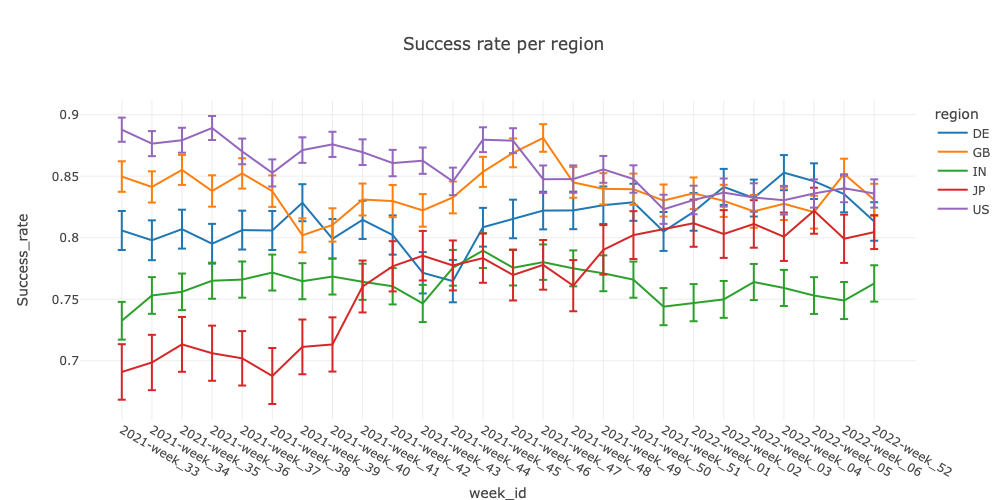

Produce the following requestser proportion graph:

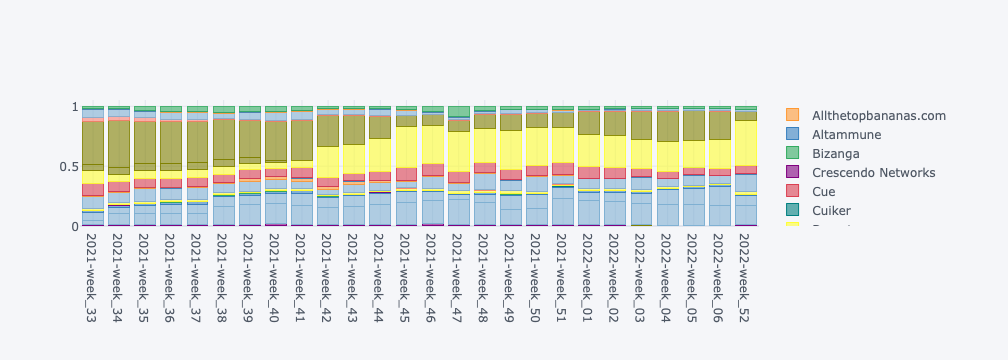

## Appendix

Code to create weekly files:

In [67]:
# for l in ad_recs_annotated.region.unique():
#     for w in ad_recs_annotated.week_id.unique():
#         w_id = w.split('_')[1]
#         y = w.split('-')[0]
#         query = f'week_id == "{w}" and region == "{l}"'
#         sample_f_name = f'{y}_{w_id}_{l}__Sample.csv'
#         ad_recs_annotated.query(query)[['week_id','ad_id','requester','region','recommendation_type', 'rec_provider']].to_csv(f'data/weekly/{sample_f_name}', index=False)
#         for s in ad_recs_annotated.recommendation_type.unique():
#             ann_f_name = f'{y}_{w_id}_{l}_{s}_annotation_result.csv'
#             query = f'week_id == "{w}" and region == "{l}" and recommendation_type == "{s}"'
#             sss = ad_recs_annotated.query(query)
#             if sss.empty:
#                 continue            
#             sss[['region','ad_id','is_success','is_sever']].drop_duplicates(subset=['ad_id']).to_csv(f'data/weekly/{ann_f_name}', index=False)